# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

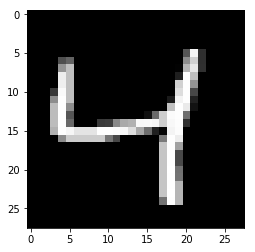

In [5]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [9]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [10]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [11]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6944
Epoch: 1/20... Training loss: 0.6917
Epoch: 1/20... Training loss: 0.6892
Epoch: 1/20... Training loss: 0.6865
Epoch: 1/20... Training loss: 0.6831
Epoch: 1/20... Training loss: 0.6793
Epoch: 1/20... Training loss: 0.6741
Epoch: 1/20... Training loss: 0.6686
Epoch: 1/20... Training loss: 0.6624
Epoch: 1/20... Training loss: 0.6541
Epoch: 1/20... Training loss: 0.6438
Epoch: 1/20... Training loss: 0.6335
Epoch: 1/20... Training loss: 0.6214
Epoch: 1/20... Training loss: 0.6088
Epoch: 1/20... Training loss: 0.5939
Epoch: 1/20... Training loss: 0.5793
Epoch: 1/20... Training loss: 0.5618
Epoch: 1/20... Training loss: 0.5445
Epoch: 1/20... Training loss: 0.5310
Epoch: 1/20... Training loss: 0.5108
Epoch: 1/20... Training loss: 0.4944
Epoch: 1/20... Training loss: 0.4709
Epoch: 1/20... Training loss: 0.4544
Epoch: 1/20... Training loss: 0.4405
Epoch: 1/20... Training loss: 0.4230
Epoch: 1/20... Training loss: 0.4068
Epoch: 1/20... Training loss: 0.3970
E

Epoch: 1/20... Training loss: 0.1976
Epoch: 1/20... Training loss: 0.1880
Epoch: 1/20... Training loss: 0.1972
Epoch: 1/20... Training loss: 0.1940
Epoch: 1/20... Training loss: 0.1919
Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.1895
Epoch: 1/20... Training loss: 0.1929
Epoch: 1/20... Training loss: 0.1904
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1942
Epoch: 1/20... Training loss: 0.1920
Epoch: 1/20... Training loss: 0.1855
Epoch: 1/20... Training loss: 0.1977
Epoch: 1/20... Training loss: 0.1924
Epoch: 1/20... Training loss: 0.1916
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1842
Epoch: 1/20... Training loss: 0.1945
Epoch: 1/20... Training loss: 0.1894
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1876
Epoch: 1/20... Training loss: 0.1831
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1822
E

Epoch: 2/20... Training loss: 0.1596
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1586
Epoch: 2/20... Training loss: 0.1608
Epoch: 2/20... Training loss: 0.1590
Epoch: 2/20... Training loss: 0.1611
Epoch: 2/20... Training loss: 0.1582
Epoch: 2/20... Training loss: 0.1567
Epoch: 2/20... Training loss: 0.1583
Epoch: 2/20... Training loss: 0.1580
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1573
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1507
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1588
Epoch: 2/20... Training loss: 0.1564
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1524
Epoch: 2/20... Training loss: 0.1474
Epoch: 2/20... Training loss: 0.1613
Epoch: 2/20... Training loss: 0.1593
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1557
E

Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1410
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1323
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1304
E

Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1286
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1292
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1260
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1279
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1221
E

Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1134
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1108
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1087
Epoch: 4/20... Training loss: 0.1111
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1131
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1134
Epoch: 4/20... Training loss: 0.1142
E

Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1046
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1037
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1064
Epoch: 5/20... Training loss: 0.1086
E

Epoch: 6/20... Training loss: 0.1097
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1100
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1104
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1041
E

Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0980
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1067
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1053
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.1079
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1050
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.0983
E

Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.0966
Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.0933
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.0959
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.0958
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.1014
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.1042
Epoch: 8/20... Training loss: 0.0984
E

Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0944
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.1019
Epoch: 8/20... Training loss: 0.0935
Epoch: 8/20... Training loss: 0.0943
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0950
Epoch: 8/20... Training loss: 0.0950
E

Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0937
Epoch: 9/20... Training loss: 0.0922
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0984
E

Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0919
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0917
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0998
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0911
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.1007
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0915
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0902
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0997
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0904
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0972
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0983
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0986
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0897
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0975
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0895
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0969
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0885
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0891
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0968
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0970
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0970
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0897
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0986
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0891
Epoch: 19/20... Training loss: 0.0903
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0898
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0884
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0890
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0980
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

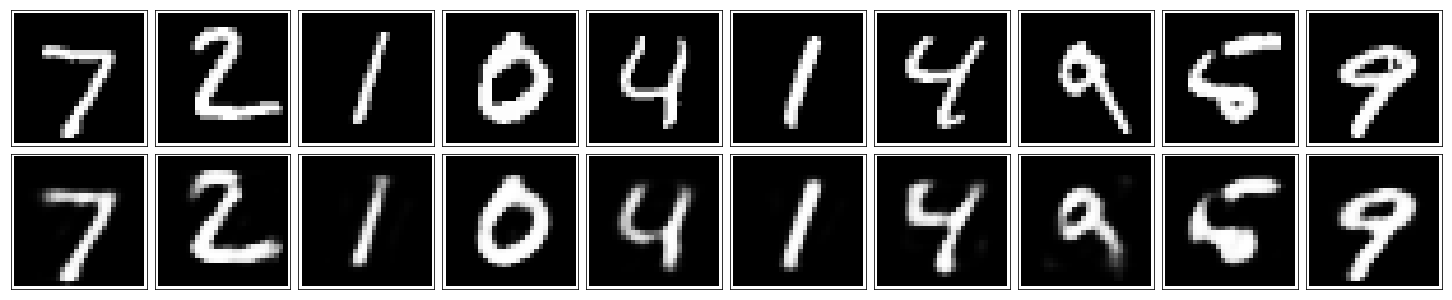

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [13]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.